<a href="https://colab.research.google.com/github/PotatoMexicano/Classification_tree_keras/blob/master/Classifica%C3%A7%C3%A3o_de_ocorr%C3%AAncias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import keras
from matplotlib import pyplot as plt

In [ ]:
valores_a = np.asarray([1,2,3]) #idade
valores_b = np.asarray([1,2,3]) #ocorrencia
valores_c = np.asarray([1,2,3]) #prioridade

labels = ['IDADE','OCORRENCIA','PRIORIDADE']

matrix = []

for val_a in valores_a:
  for val_b in valores_b:
    for val_c in valores_c:
      matrix.append([val_a, val_b, val_c])

matrix = np.asarray(matrix)
print(matrix.shape)

(27, 3)


In [ ]:
resultados = np.array([[1],[1],[1],[1],[1],[1],[1],[1],[1],[1],[0],[1],[0],[0],[0],[0],[0],[1],[1],[1],[1],[0],[0],[0],[0],[0],[0]])
resultados.shape

(27, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(matrix, resultados, test_size=0.2)

#x_train = matrix
#y_train = resultados

In [ ]:
x_train.shape

(21, 3)

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=3, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs=600, verbose=0, batch_size=2)
#model.train_on_batch(x_test, y_test, sample_weight=None, class_weight=None)

In [ ]:
_, accuracy = model.evaluate(x_test, y_test)
#_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 146ms/step - loss: 1.4510e-04 - acc: 1.0000
Accuracy: 100.00


In [ ]:
predictions = model.predict( np.asmatrix( [2,3,3] ) )
class_names = ['NÃO','SIM']
print(int(np.rint(predictions[0][0])))
print(class_names[int(np.rint(predictions[0][0]))])

1
SIM


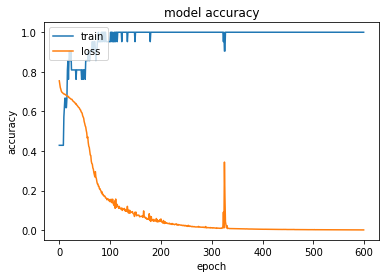

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

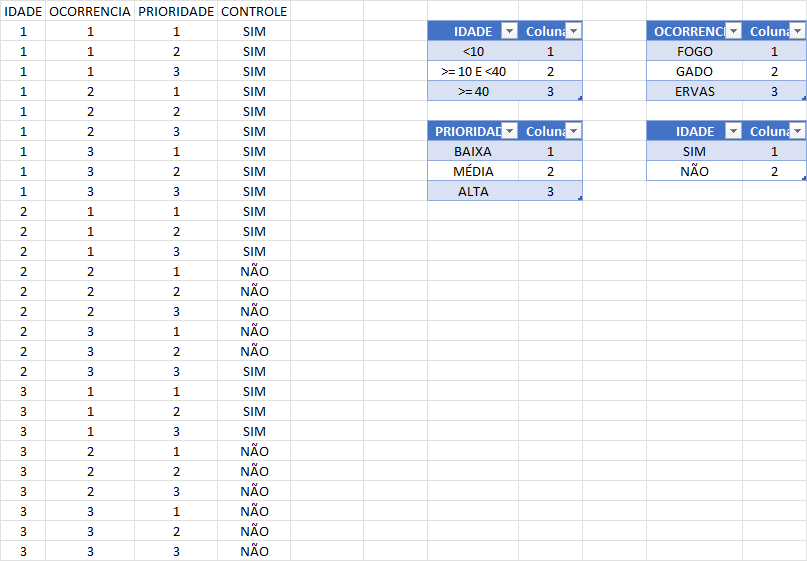

**MATRIZ DE DECISÃO USANDO ARVORE**

In [ ]:
from sklearn import tree
#!apt-get install graphviz
#!pip install dtreeviz
from IPython.display import display
import graphviz

In [ ]:
model_tree = tree.DecisionTreeClassifier(criterion="entropy")
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

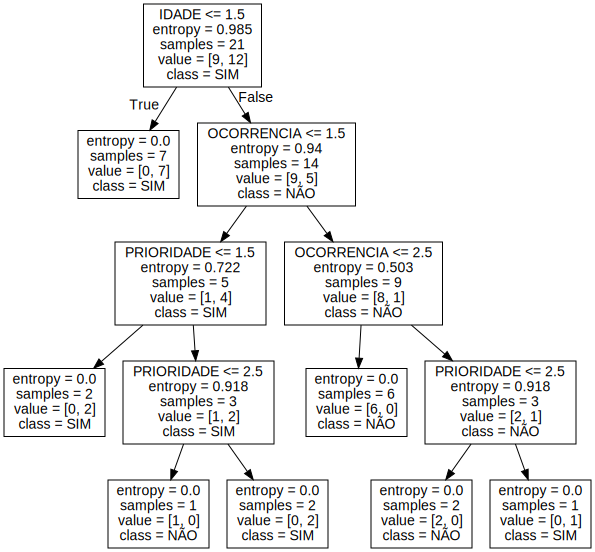

In [ ]:
y_pred = model_tree.predict(x_train)
display(graphviz.Source(tree.export_graphviz(model_tree, feature_names=labels, class_names=class_names )))

BASE DE TESTES PROCESSADA **ERRADO**

In [ ]:
total = x_test.shape[0]

for n in range(total):
  teste_personalizado = np.reshape(np.array(x_test[n]),(1,3))
  if not(int(np.rint(model.predict(teste_personalizado))) == y_test[n]):
    print("Registro processado errado: \n")
    print(x_test[n], '=', y_test[n], end=" -> IA ")
    print([int(np.rint(model.predict(teste_personalizado)))], end=" -> TREE ")
    print([int(np.rint(model_tree.predict(teste_personalizado)))])

In [ ]:
teste_personalizado = np.reshape(np.array([2,1,1]),(1,3)) #MUDE ISSO PARA TESTAR

print(class_names[int(np.rint(model_tree.predict(teste_personalizado)))])
print(class_names[int(np.rint(model.predict(teste_personalizado)))])
print(int(np.rint(model.predict(teste_personalizado))))

SIM
SIM
1
